Q. A factory has a machine that dispenses 80.17 mL of fluid into a bottle. An employee believes that the average amount of fluid isn’t 80.17 mL Using 32 samples, he measures the average amount dispensed by the machine to be **(Smean)**mL with a sample standard deviation of **(Ssd)**mL.
At a **X% (user input)** confidence level, is there enough evidence to support the idea that the machine is not working properly?

```
X : confidence
Smean : Sample space mean
Ssd : Sample space std deviation
```



**1. Imports**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
from pandas import *
import random
import math
import csv

**2. Reading Data from CSV**

In [ ]:
file = open("liquid.csv","r")
data = list(csv.reader(file, delimiter=","))
file.close()

finaldata = []
for x in data:
  finaldata.append(float(x[0]))
finaldata.sort()
print("Population Data : \n\n",finaldata)

Population Data : 

 [74.25, 74.88, 75.19, 75.51, 76.05, 76.09, 76.4, 76.53, 76.76, 76.92, 77.06, 77.27, 77.48, 77.69, 77.77, 77.83, 77.83, 77.84, 77.89, 78.21, 78.43, 78.44, 78.44, 78.54, 78.54, 78.57, 78.62, 78.7, 78.75, 78.89, 78.9, 79.06, 79.09, 79.12, 79.12, 79.21, 79.26, 79.31, 79.34, 79.43, 79.45, 79.48, 79.56, 79.57, 79.58, 79.74, 79.83, 79.94, 79.96, 80.15, 80.16, 80.17, 80.2, 80.22, 80.23, 80.26, 80.33, 80.39, 80.41, 80.44, 80.45, 80.56, 80.58, 80.58, 80.63, 80.67, 81.04, 81.16, 81.39, 81.45, 81.49, 81.51, 81.54, 81.58, 81.84, 81.86, 81.9, 81.92, 82.09, 82.21, 82.31, 82.38, 82.43, 82.74, 82.82, 82.84, 82.84, 82.97, 83.34, 83.59, 83.83, 83.86, 83.91, 84.01, 84.35, 84.42, 85.19, 85.7, 86.02, 88.07]


**3. Finding Mean and Std Deviation of Population**

Population mean :  80.17 
Pouplation Std deviation :  2.55

Null Hypothesis : mu = 80.17
Alternate Hypothesis : mu != 80.17

Distribution of population data : 



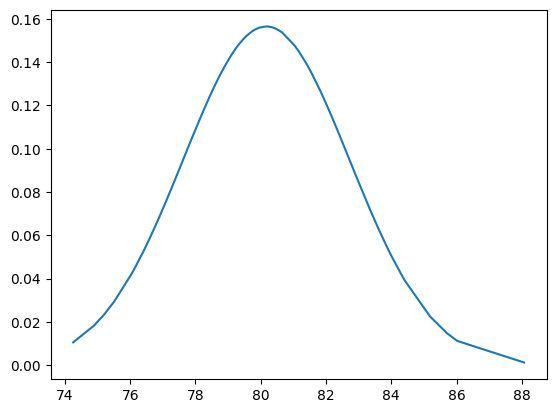

In [6]:
mean = round(statistics.mean(finaldata),2)
sd = round(statistics.stdev(finaldata),2)

print("Population mean : ",mean,"\nPouplation Std deviation : ",sd)
Xaxis = finaldata
Yaxis = norm.pdf(finaldata, mean, sd)

print('\033[93m' + "\033[1m" + "\nNull Hypothesis : mu = " + str(mean) + "\033[0m")
print('\033[93m' + "\033[1m" + "Alternate Hypothesis : mu != " + str(mean) + "\033[0m")

print("\nDistribution of population data : \n")
plt.plot(Xaxis, Yaxis)
plt.show()

**4. Generating Sample Space**

In [31]:
sample = random.sample(finaldata,40)
print("Sample Data : \n\n",sample)

Smean = statistics.mean(sample)
Ssd = statistics.stdev(sample)

print("\nSample mean : ",Smean,"\nSample std dev : ",Ssd)
SZval = (Smean - mean)/(Ssd/math.sqrt(32))
SZval = round(SZval,2)
print("\nSample Z value : ", SZval,"\n")

Sample Data : 

 [79.83, 79.94, 77.06, 79.57, 82.84, 82.82, 75.19, 80.58, 80.15, 81.51, 79.21, 77.27, 81.86, 80.33, 74.88, 81.54, 76.4, 76.92, 75.51, 76.05, 79.56, 78.54, 78.7, 79.12, 81.9, 77.77, 76.76, 79.48, 79.31, 83.86, 81.92, 80.16, 78.89, 82.09, 76.53, 79.43, 81.45, 77.84, 78.75, 83.34]

Sample mean :  79.3715 
Sample std dev :  2.342333430029956

Sample Z value :  -1.93 



**5. Showing Acceptance and Rejection regions for Null Hypothesis**

Enter confidence level (X%) : 98

Significance level (alpha) :  0.02
alpha/2 :  0.01
Z value is :  -2.33 , 2.33 


Normal distribution of confidence level 98 % :



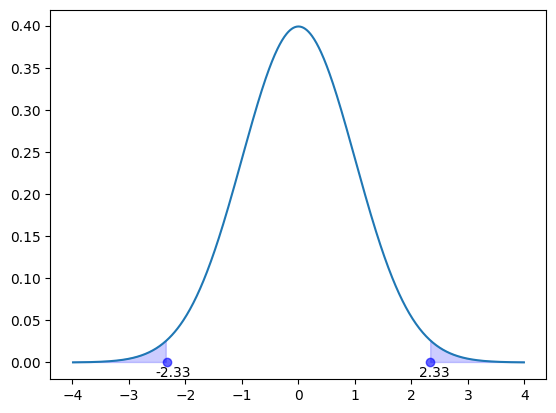

In [34]:
confidence = int(input("Enter confidence level (X%) : "))
significance = float("{:.2f}".format((1 - (confidence)/100)))
print("\nSignificance level (alpha) : ",significance)
print("alpha/2 : ",significance/2)

Zval = norm.ppf(float("{:.4f}".format(significance/2)))
Zval = round(Zval,2)
print("Z value is : ",Zval,",",-1*Zval,"\n")

normx_temp = np.arange(-3.99,4.00,0.01)
normx = np.round(normx_temp, 2).tolist()
normy = norm.pdf(normx,0,1)

print("\nNormal distribution of confidence level",confidence,"% :\n")
plt.plot(normx, normy)
plt.scatter(Zval, [0], color="blue",alpha=0.6)
plt.text(Zval- 0.2,-0.017,Zval)
plt.scatter(-1*Zval, [0], color="blue",alpha=0.6)
plt.text(-1*Zval - 0.2,-0.017,-1*Zval)
plt.fill_between(
        x= normx, 
        y1= normy, 
        where= (normx < Zval)|(normx > -1*Zval),
        color= "b",
        alpha= 0.2)

plt.show()



** The Null Hypothesis is Accepted **




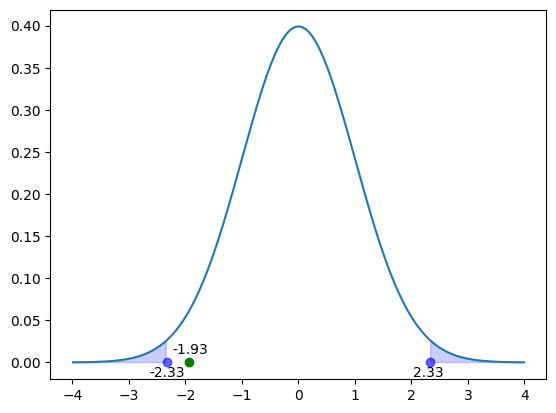

In [35]:
print("\n")
SZcolor = ""
if(SZval < Zval or SZval > -1*Zval):
  result = '\033[91m' + "** The Null Hypothesis is Rejected **"
  SZcolor = "red"
else:
  result = '\033[92m' + "** The Null Hypothesis is Accepted **"
  SZcolor = "green"

print("\033[1m" + result + "\033[0m")
print("\n")

plt.plot(normx, normy)
plt.scatter(SZval, [0], color=SZcolor)
plt.text(SZval- 0.3,0.01,SZval)
plt.scatter(Zval, [0], color="blue",alpha=0.6)
plt.text(Zval- 0.3,-0.017,Zval)
plt.scatter(-1*Zval, [0], color="blue",alpha=0.6)
plt.text(-1*Zval - 0.3,-0.017,-1*Zval)
plt.fill_between(
        x= normx, 
        y1= normy, 
        where= (normx < Zval)|(normx > -1*Zval),
        color= "b",
        alpha= 0.2)

plt.show()

**References**

1. https://www.geeksforgeeks.org/how-to-plot-a-normal-distribution-with-matplotlib-in-python/
2. https://www.statology.org/normal-distribution-dataset-generator/
3. https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.fill_between.html
4. https://www.geeksforgeeks.org/python-random-sample-function/
5. https://www.geeksforgeeks.org/how-to-find-the-z-critical-value-in-python/
6. https://www.skytowner.com/explore/drawing_a_single_point_in_matplotlib
7. https://www.geeksforgeeks.org/how-to-annotate-matplotlib-scatter-plots/